In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax
import get_initialization_cond as init
import optimization_SPDC as opt
import jaxopt
import jax.scipy.optimize as optimize
import numpy as np

key = jax.random.PRNGKey(0)

In [2]:
Np = 0.01
# higher N and wf+wi makes less unstable pump... need to see if N or wf+wi influences more
N = 601
wi = -10
wf = 10
x = jnp.linspace(wi, wf, N)
freq_range_pump = jnp.linspace(2*wi, 2*wf, 2*N)
freq_range_pump_complex = jnp.concatenate((freq_range_pump, freq_range_pump)).reshape(4*N,)
vp = 0.1
l = 1
# For an unstable pump, just change amplitude to 0.2 and width to 0.2 at N = 1
hermite_init_params = [2, 0.05, 0.3, jnp.pi/5]
cst_init_params = [0.1]
alpha, G, H = init.get_constants(vp, l, wi, wf, Np, N = N)
# get the initialization seeds
initial_value_gauss = jnp.array([0.5, 1., 2*jnp.pi/7])
arbitrary_seed_hermite = init.get_initialization_array(hermite_init_params, vp, l, wi, wf, Np, method='hermite', N = N)
random_seed = 0.01*jax.random.uniform(key, shape=(4*N,))
phi = 2*jnp.pi*jax.random.uniform(key)
y_N = 5

In [19]:
solver_K = jaxopt.PolyakSGD(opt.get_loss_K, maxiter=5, verbose=1)
solver_N = jaxopt.PolyakSGD(opt.get_loss_N, maxiter=20, verbose=1)   
solver = jaxopt.PolyakSGD(opt.get_loss, maxiter=100, verbose=1) 

In [23]:
pump = random_seed.copy()
(pump, state) = solver.run(pump, N, alpha, G, H, l, freq_range_pump, y_N)

error: 233.2064
error: 112.012634
error: 91.41702
error: 64.03452
error: 59.94392
error: 35.14683
error: 43.524044
error: 13.186435
error: 29.959309
error: 7.539593
error: 11.991227
error: 4.7137685
error: 6.4480615
error: 2.0443926
error: 4.7699265
error: 0.4625502
error: 14.424387
error: 5.547262
error: 0.6453144
error: 6.460557
error: 2.0389001
error: 5.244437
error: 0.5966284
error: 6.689095
error: 2.4504383
error: 3.4510238
error: 1.2194365
error: 8.15957
error: 2.5910337
error: 1.838391
error: 4.1295085
error: 0.19511202
error: 4.0190415
error: 0.17402798
error: 3.1005294
error: 0.92175674
error: 10.147998
error: 3.846577
error: 0.17520666
error: 3.2338922
error: 0.6807368
error: 13.840018
error: 5.7266154
error: 1.3853347
error: 3.4277637
error: 0.1171076
error: 0.5658388
error: 6.4063993
error: 2.7235236
error: 1.0421094
error: 4.1295743
error: 0.90352434
error: 8.122801
error: 2.9338474
error: 0.65294015
error: 12.889922
error: 5.3794403
error: 1.3353176
error: 3.1352124
error

In [4]:
pump = random_seed.copy()
for i in range(10):
    print("Loop " + str(i) + " for K")
    (pump, state) = solver_K.run(pump, N, alpha, G, H, l, freq_range_pump)
    print("Loop " + str(i) + " for N")
    (pump, state) = solver_N.run(pump, N, alpha, G, H, l, y_N)

Loop 0 for K
error: 541.3239
error: 245.7988
error: 140.0841
error: 178.94304
Loop 0 for N
error: 0.06672315
error: 0.07503613
error: 0.08433486
error: 0.09471352
error: 0.106265135
error: 0.11907565
error: 0.13321528
error: 0.1487254
error: 0.16560002
error: 0.18375881
error: 0.20300952
error: 0.2229976
error: 0.24313992
error: 0.2625437
error: 0.27991715
error: 0.2934946
error: 0.30102447
error: 0.2999171
error: 0.28769124
Loop 1 for K
error: 7.733236
error: 17.871737
error: 3.019166
error: 14.036781
Loop 1 for N
error: 0.016879253
error: 0.008411281
error: 0.004198605
error: 0.0020974318
error: 0.0010481506
error: 0.00052398164
Loop 2 for K
error: 11.067432
error: 2.1080685
error: 13.655944
error: 4.8386774
Loop 2 for N
error: 0.21847954
error: 0.105586566
error: 0.051834267
error: 0.025670689
error: 0.012772642
error: 0.006370707
error: 0.003181298
error: 0.0015895298
error: 0.00079440227
Loop 3 for K
error: 7.194381
error: 1.0966797
error: 16.947721
error: 7.3456354
Loop 3 for N
e

(DeviceArray(6.1297665, dtype=float32), DeviceArray(1.0685395, dtype=float32))

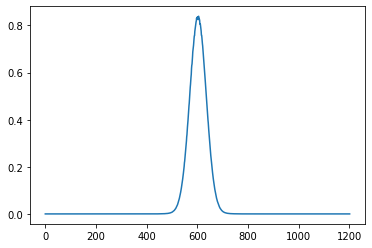

In [24]:
plt.plot(jnp.abs(opt.get_complex_array(pump)))
#plt.plot(jnp.angle(opt.get_complex_array(pump)))
opt.get_observables(pump, N, alpha, G, H, l)

(DeviceArray(5.000048, dtype=float32), DeviceArray(1.2693273, dtype=float32))

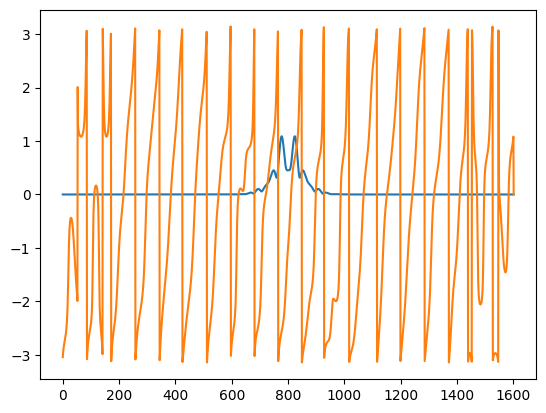

In [26]:
plt.plot(jnp.abs(opt.get_complex_array(pump)))
plt.plot(jnp.angle(opt.get_complex_array(pump)))
opt.get_observables(pump, N, alpha, G, H, l)

In [19]:
opt.get_loss_N(arbitrary_seed_hermite_order_1, N, alpha, G, H, l, y_N)

DeviceArray(1.5572517, dtype=float32)

In [7]:
# first attempt


DeviceArray(2.6292431, dtype=float32)

In [ ]:
# Try get a hang of using Greens function
